C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Data/PSI_P_cell/test_12-05-25_Increase_decrease_1
headers start on line 7
['Time', 'Force (kg)', 'Sample pressure (kg/m2)', 'Hydraulic pressure (kg/m2)', 'Vertical movement 1 (um)', 'Vertical movement 2 (um)', 'Horizontal movement 1 (um)', 'Horizontal movement 2 (um)', 'Horizontal movement 3 (um)']
                         Time  elapsed_seconds
0     09.02.2025 12:43:10.045            0.000
1     09.02.2025 12:43:11.050            1.005
2     09.02.2025 12:43:12.048            2.003
3     09.02.2025 12:43:13.048            3.003
4     09.02.2025 12:43:14.048            4.003
...                       ...              ...
2397  09.02.2025 13:23:07.109         2397.064
2398  09.02.2025 13:23:08.108         2398.063
2399  09.02.2025 13:23:09.107         2399.062
2400  09.02.2025 13:23:10.106         2400.061
2401  09.02.2025 13:23:11.108         2401.063

[2402 rows x 2 columns]
['Time', 'Force (kg)', 

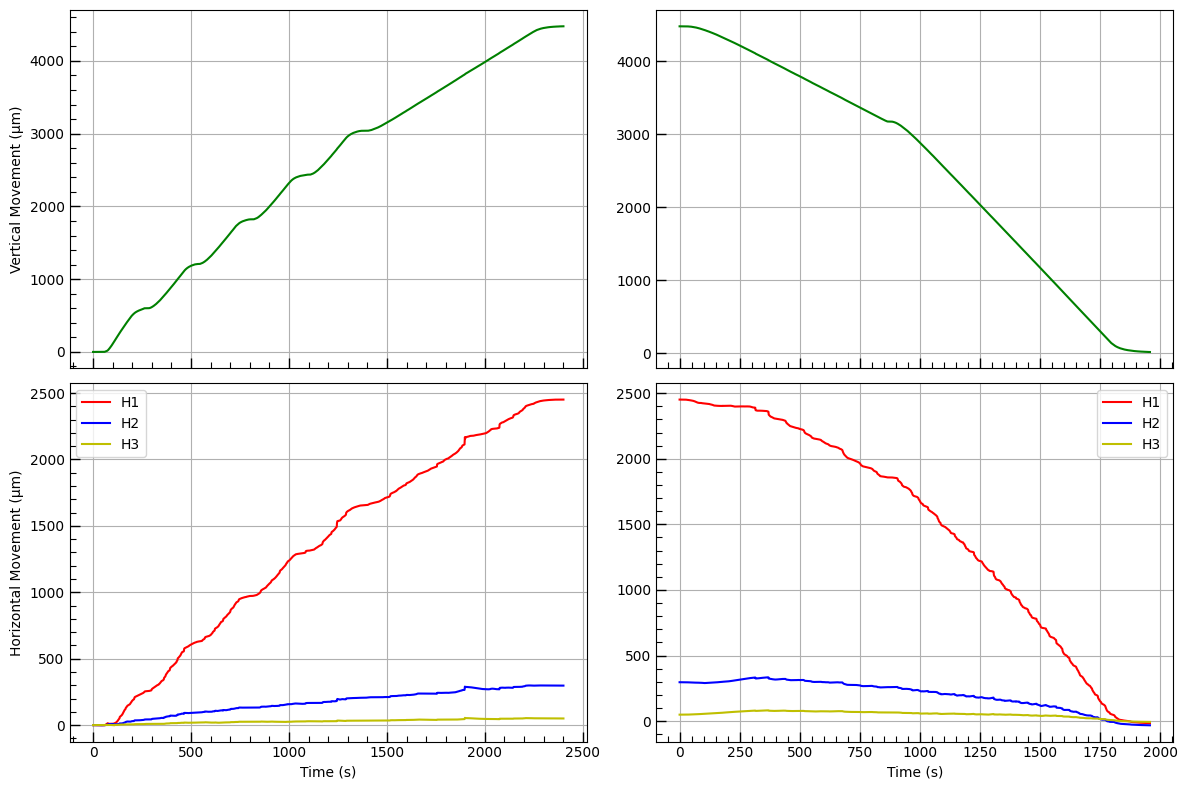

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as scop
import csv
import matplotlib as mpl
#import seaborn as sns
#import Stoner

#THIS BLOCK Sanitises THE DATA AND CONVERTS IT FROM CGS TO SI UNITS IF REQUIRED 


#Filepath where the point the test datafile exists in so it can be accessed
#C:\Users\thoma\Documents\Physics_Work\Python Scripts\strain-cell\PPMS_Data_and_Plotting\Data\PSI_P_cell\test_9-5-25_increase+decrease-1
filepath = "C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Data/PSI_P_cell/"
file = "test_12-05-25_Increase_decrease_1"

FILEANDPATH=filepath+file

print(FILEANDPATH)

Labels = ['Time Stamp (sec)', 'Temperature (K)', 'Magnetic Field (Oe)', 'Moment (emu)', 'Chamber Temp (K)', 'Average Temp (K)' ]
#print(FILEANDPATH)


#The filetypes from a PPMS cryostat have a huge amount of non delimeted information at the start, this throws an error when 
#accessed using the csv pandas function so this try and except loop finds the headers as they are in csv format 
index_of_headers = 0
for i in range(100):
    try:
        df_raw_data = pd.read_csv(FILEANDPATH, sep=",", skiprows=i, encoding='unicode_escape')
        print("headers start on line", i,)
        #make a note of when headers start, need to +1 as we will skip this many rows later and the first one that works is 
        # found not to format the columns correctly
        index_of_headers = int(i+1)
        break
    except:
        None
        #print("headers don't start on line", i,)
    
#print(index_of_headers)

#new dataframe using the index for headers we found
#C:\Users\thoma\Documents\Physics_Work\Python Scripts\strain-cell\PPMS_Data_and_Plotting\Data\PSI_P_cell\test_12-05-25_Increase_decrease_1
df_increase = pd.read_csv("C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Data/PSI_P_cell/test_14-5-25_vertical_increase-1", sep=",", skiprows= index_of_headers, encoding='unicode_escape')
df_decrease = pd.read_csv("C:/Users/thoma/Documents/Physics_Work/Python Scripts/strain-cell/PPMS_Data_and_Plotting/Data/PSI_P_cell/test_14-5-25_vertical_decrease-1",sep=",", skiprows= index_of_headers, encoding='unicode_escape')
print(df_increase.columns.tolist())

df_increase['time'] = pd.to_datetime(df_increase['Time'], format='%d.%m.%Y %H:%M:%S.%f')
df_decrease['time'] = pd.to_datetime(df_decrease['Time'], format='%d.%m.%Y %H:%M:%S.%f')
# Subtract the first timestamp to get a timedelta
df_increase['elapsed_seconds'] = (df_increase['time'] - df_increase['time'].iloc[0]).dt.total_seconds()
df_decrease['elapsed_seconds'] = (df_decrease['time'] - df_decrease['time'].iloc[0]).dt.total_seconds()

# Save or inspect
print(df_increase[['Time', 'elapsed_seconds']])
print(df_increase.columns.tolist())
#Vertical movement 1 (um),Vertical movement 2 (um),Horizontal movement 1 (um),Horizontal movement 2 (um),Horizontal movement 3 (um)


'''
#This section is to seperate the data if you save it for both increasing and decreasing in one file

target_col = 'Vertical movement(um)'  # Replace with your column of interest
max_index = df['Vertical movement (um)'].idxmax()

# --- Split the DataFrame at the max point ---
df_increase = df.iloc[:max_index + 1]   # Include the row with the max value
df_decrease = df.iloc[max_index + 1:]'''

x = df_increase.loc[:,'elapsed_seconds']
y0 = df_increase.loc[:,'Vertical movement 1 (um)']
y1 = df_increase.loc[:,'Horizontal movement 1 (um)']
y2 = df_increase.loc[:,'Horizontal movement 2 (um)']
y3 = df_increase.loc[:,'Horizontal movement 3 (um)']

x1 = df_decrease.loc[:,'elapsed_seconds']
y00 = df_decrease.loc[:,'Vertical movement 1 (um)'] 
y11 = df_decrease.loc[:,'Horizontal movement 1 (um)']
y22 = df_decrease.loc[:,'Horizontal movement 2 (um)']
y33 = df_decrease.loc[:,'Horizontal movement 3 (um)']


# Plotting
#fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(6, 10))
fig, axs = plt.subplots(2, 2, figsize=(12, 8), sharex='col')

# First plot
axs[0,0].plot(x, y0, color='g')

axs[0,0].minorticks_on()
# Customize major ticks
axs[0,0].tick_params(axis='both', which='major',
               direction='in',       # ticks go inward
               length=7,             # length of major ticks
               width=1)

# Customize minor ticks
axs[0,0].tick_params(axis='both', which='minor',
               direction='in',       # ticks go inward
               length=4,             # length of minor ticks
               width=0.8)
axs[0,0].grid('both')
axs[0,0].set_ylabel('Vertical Movement (μm)') 
figsize=(2, 4)




# Second plot
axs[1,0].plot(x, y1, label='H1', color='r')
axs[1,0].plot(x, y2, label='H2', color='b')
axs[1,0].plot(x, y3, label='H3', color='y')

axs[1,0].minorticks_on()
# Customize major ticks
axs[1,0].tick_params(axis='both', which='major',
               direction='in',       # ticks go inward
               length=7,             # length of major ticks
               width=1)

# Customize minor ticks
axs[1,0].tick_params(axis='both', which='minor',
               direction='in',       # ticks go inward
               length=4,             # length of minor ticks
               width=0.8)

axs[1,0].set_xlabel('Time (s)') 
axs[1,0].set_ylabel('Horizontal Movement (μm)') 

axs[1,0].grid('both')
figsize=(2, 4)
axs[1,0].legend()




#Third Plot
axs[0,1].plot(x1, y00, label='Vertical', color='g')

# Customize major ticks
axs[0,1].tick_params(axis='both', which='major',
               direction='in',       # ticks go inward
               length=7,             # length of major ticks
               width=1)

# Customize minor ticks
axs[0,1].tick_params(axis='both', which='minor',
               direction='in',       # ticks go inward
               length=4,             # length of minor ticks
               width=0.8)
axs[0,1].grid('both')
figsize=(2, 4)




# Fourth plot
axs[1,1].plot(x1, y11, label='H1', color='r')
axs[1,1].plot(x1, y22, label='H2', color='b')
axs[1,1].plot(x1, y33, label='H3', color='y')

axs[1,1].minorticks_on()
# Customize major ticks
axs[1,1].tick_params(axis='both', which='major',
               direction='in',       # ticks go inward
               length=7,             # length of major ticks
               width=1)

# Customize minor ticks
axs[1,1].tick_params(axis='both', which='minor',
               direction='in',       # ticks go inward
               length=4,             # length of minor ticks
               width=0.8)


axs[1,1].set_xlabel('Time (s)') 
axs[1,1].grid('both')
figsize=(2, 4)

axs[1,1].legend()
plt.tight_layout()
plt.show()